# Introduction

This tutorial provides instructions on nhow to use `city_metrix` to extract different data layers based on user-specific geometry.

Every layer is defined as separate python class:

| Layer name | class name | Parameters | Layer metadata |
| ---- | ---- | ---- | ---- |
| Tropical Tree Cover | `TreeCover()` | `min_tree_cover`: a threshold to use to filter the minimum percent of tree cover| |
| EsaWorldCover | `EsaWorldCover()` | `EsaWorldCoverClass`: a specific class of land cover| |
| Land Surface Temeprature | `LandSurfaceTemperature()` | | |
| High Land Surface Temeprature | `HighLandSurfaceTemperature()` | | |

# Set up

In [1]:
import os
import geopandas as gpd
from rasterio.plot import show
import rasterio

In [3]:
# # update the wd path to be able to laod the module
os.chdir('../..')
os.getcwd()

'C:\\Users\\Saif.Shabou\\OneDrive - World Resources Institute\\Documents\\cities-indicators-framework\\citymetrix\\cities-cif\\notebooks'

In [22]:
os.environ['GCS_BUCKET']='gee-exports'
os.environ['GOOGLE_APPLICATION_USER']='developers@citiesindicators.iam.gserviceaccount.com'
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='C:\\Users\Saif.Shabou\OneDrive - World Resources Institute\Documents\cities-indicators-framework\citymetrix\credentials-citiesindicators.json'

In [7]:
from city_metrix.layers import Albedo, EsaWorldCoverClass, EsaWorldCover, HighLandSurfaceTemperature, TreeCover, OSMOpenSpace

Authenticating to GEE with configured credentials file.


In [8]:
# load boundary
boundary_path = 'https://cities-indicators.s3.eu-west-3.amazonaws.com/data/boundaries/boundary-BRA-Salvador-ADM4union.geojson'
city_gdf = gpd.read_file(boundary_path, driver='GeoJSON')
city_gdf.head()

,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.50140..."


# Tropical Tree Cover

In [ ]:
from city_metrix.layers import TreeCover

In [23]:
# Load layer
city_TreeCover = TreeCover().get_data(city_gdf.total_bounds)
city_TreeCover

<xarray.DataArray 'ttc' (y: 2878, x: 3722)>
array([[ nan,  nan,  nan, ..., 100.,  90.,  90.],
       [ nan,  nan,  nan, ...,  90.,  90.,  90.],
       [ nan,  nan,  nan, ...,  90.,  90.,  80.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
    time     int32 0
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             ttc
    data_type:      {'type': 'PixelType', 'precision': 'double', 'min': 0, 'm...
    crs:            EPSG:4326
    crs_transform:  [1, 0, 0, 0, 1, 0]

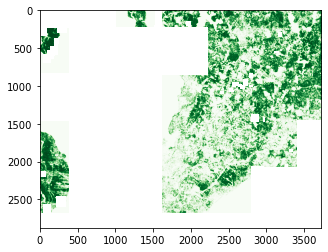

<AxesSubplot:>

In [10]:
show(city_TreeCover, cmap='Greens')

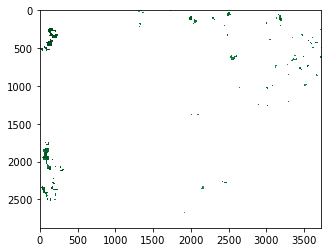

<AxesSubplot:>

In [11]:
# tropical tree cover by specifying minimum tree cover param
city_TreeCover_50= TreeCover(min_tree_cover = 50).get_data(city_gdf.total_bounds)
show(city_TreeCover_50, cmap='Greens')

# ESA World Cover

In [ ]:
from city_metrix.layers import EsaWorldCoverClass, EsaWorldCover

In [14]:
# Load World cover layer
city_LandCover = EsaWorldCover().get_data(city_gdf.total_bounds)
city_LandCover

<xarray.DataArray 'Map' (y: 2878, x: 3722)>
array([[80., 80., 80., ..., 30., 30., 30.],
       [80., 80., 80., ..., 30., 30., 30.],
       [80., 80., 80., ..., 30., 30., 30.],
       ...,
       [50., 50., 50., ..., 80., 80., 80.],
       [50., 50., 50., ..., 80., 80., 80.],
       [50., 50., 50., ..., 80., 80., 80.]])
Coordinates:
    time     datetime64[ns] 2020-01-01
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             Map
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max'...
    dimensions:     [4320000, 1728000]
    crs:            EPSG:4326
    crs_transform:  [8.333333333333333e-05, 0, -180, 0, -8.333333333333333e-0...

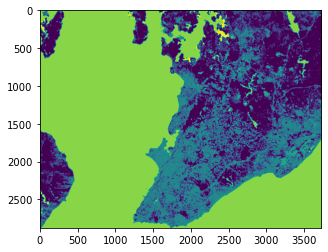

<AxesSubplot:>

In [15]:
show(city_LandCover)

In [16]:
# Load World cover - built up layer
city_LandCoverBuiltUp = EsaWorldCover(land_cover_class=EsaWorldCoverClass.BUILT_UP).get_data(city_gdf.total_bounds)
city_LandCoverBuiltUp

<xarray.DataArray 'Map' (y: 2878, x: 3722)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [50., 50., 50., ..., nan, nan, nan],
       [50., 50., 50., ..., nan, nan, nan],
       [50., 50., 50., ..., nan, nan, nan]])
Coordinates:
    time     datetime64[ns] 2020-01-01
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             Map
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max'...
    dimensions:     [4320000, 1728000]
    crs:            EPSG:4326
    crs_transform:  [8.333333333333333e-05, 0, -180, 0, -8.333333333333333e-0...

# Land surface temperature

In [30]:
from city_metrix.layers import HighLandSurfaceTemperature, LandSurfaceTemperature

In [26]:
%%time

city_high_lst = HighLandSurfaceTemperature().get_data(city_gdf.total_bounds)
city_high_lst

CPU times: total: 828 ms
Wall time: 23.7 s


<xarray.DataArray 'ST_B10_mean' (y: 960, x: 1241)>
array([[        nan,         nan,         nan, ..., 36.51061208,
        38.10682742, 35.52793133],
       [        nan,         nan,         nan, ..., 36.35338316,
        35.65439807, 36.26280563],
       [        nan,         nan,         nan, ...,         nan,
        36.32774801, 36.84899606],
       ...,
       [36.9298892 , 37.08483944, 37.21757255, ...,         nan,
                nan,         nan],
       [36.67296803, 36.7760783 , 36.8102585 , ...,         nan,
                nan,         nan],
       [37.47164537, 37.3856252 , 37.21985123, ...,         nan,
                nan,         nan]])
Coordinates:
    time     int32 0
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.31 -38.3 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             ST_B10_mean
    data_type:      {'type': 'PixelType', 'precision': 'double', 'min': -124....
    crs:            EPSG:4326
    crs_transform:  [1, 0, 0, 0, 1, 0]

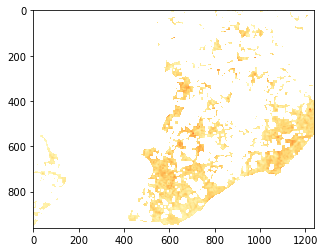

<AxesSubplot:>

In [ ]:
show(city_high_lst, cmap='YlOrRd')

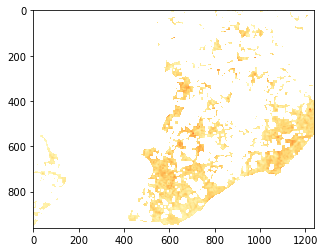

CPU times: total: 781 ms
Wall time: 6.99 s


<AxesSubplot:>

In [38]:
# Select a period of interest

%%time

city_high_lst = HighLandSurfaceTemperature(start_date="2013-01-01", end_date="2023-01-01").get_data(city_gdf.total_bounds)
show(city_high_lst, cmap='YlOrRd')

CPU times: total: 984 ms
Wall time: 20.9 s


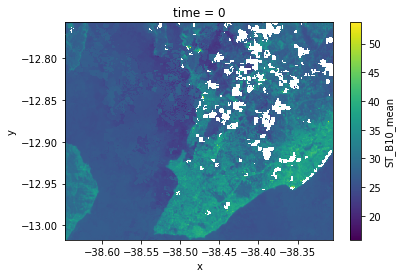

In [33]:
# Select a period of interest

%%time

city_lst = LandSurfaceTemperature(start_date="2013-01-01", end_date="2023-01-01").get_data(city_gdf.total_bounds)
city_lst.plot()

In [36]:
city_lst.mean()

<xarray.DataArray 'ST_B10_mean' ()>
array(28.21364284)
Coordinates:
    time     int32 0

In [39]:
# Select one year
city_lst_2022 = LandSurfaceTemperature(start_date="2022-01-01", end_date="2022-12-01").get_data(city_gdf.total_bounds)
city_lst_2022.mean()

<xarray.DataArray 'ST_B10_mean' ()>
array(29.61578893)
Coordinates:
    time     int32 0